# Data Science in Finance and Insurance - Project

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Preprocessing

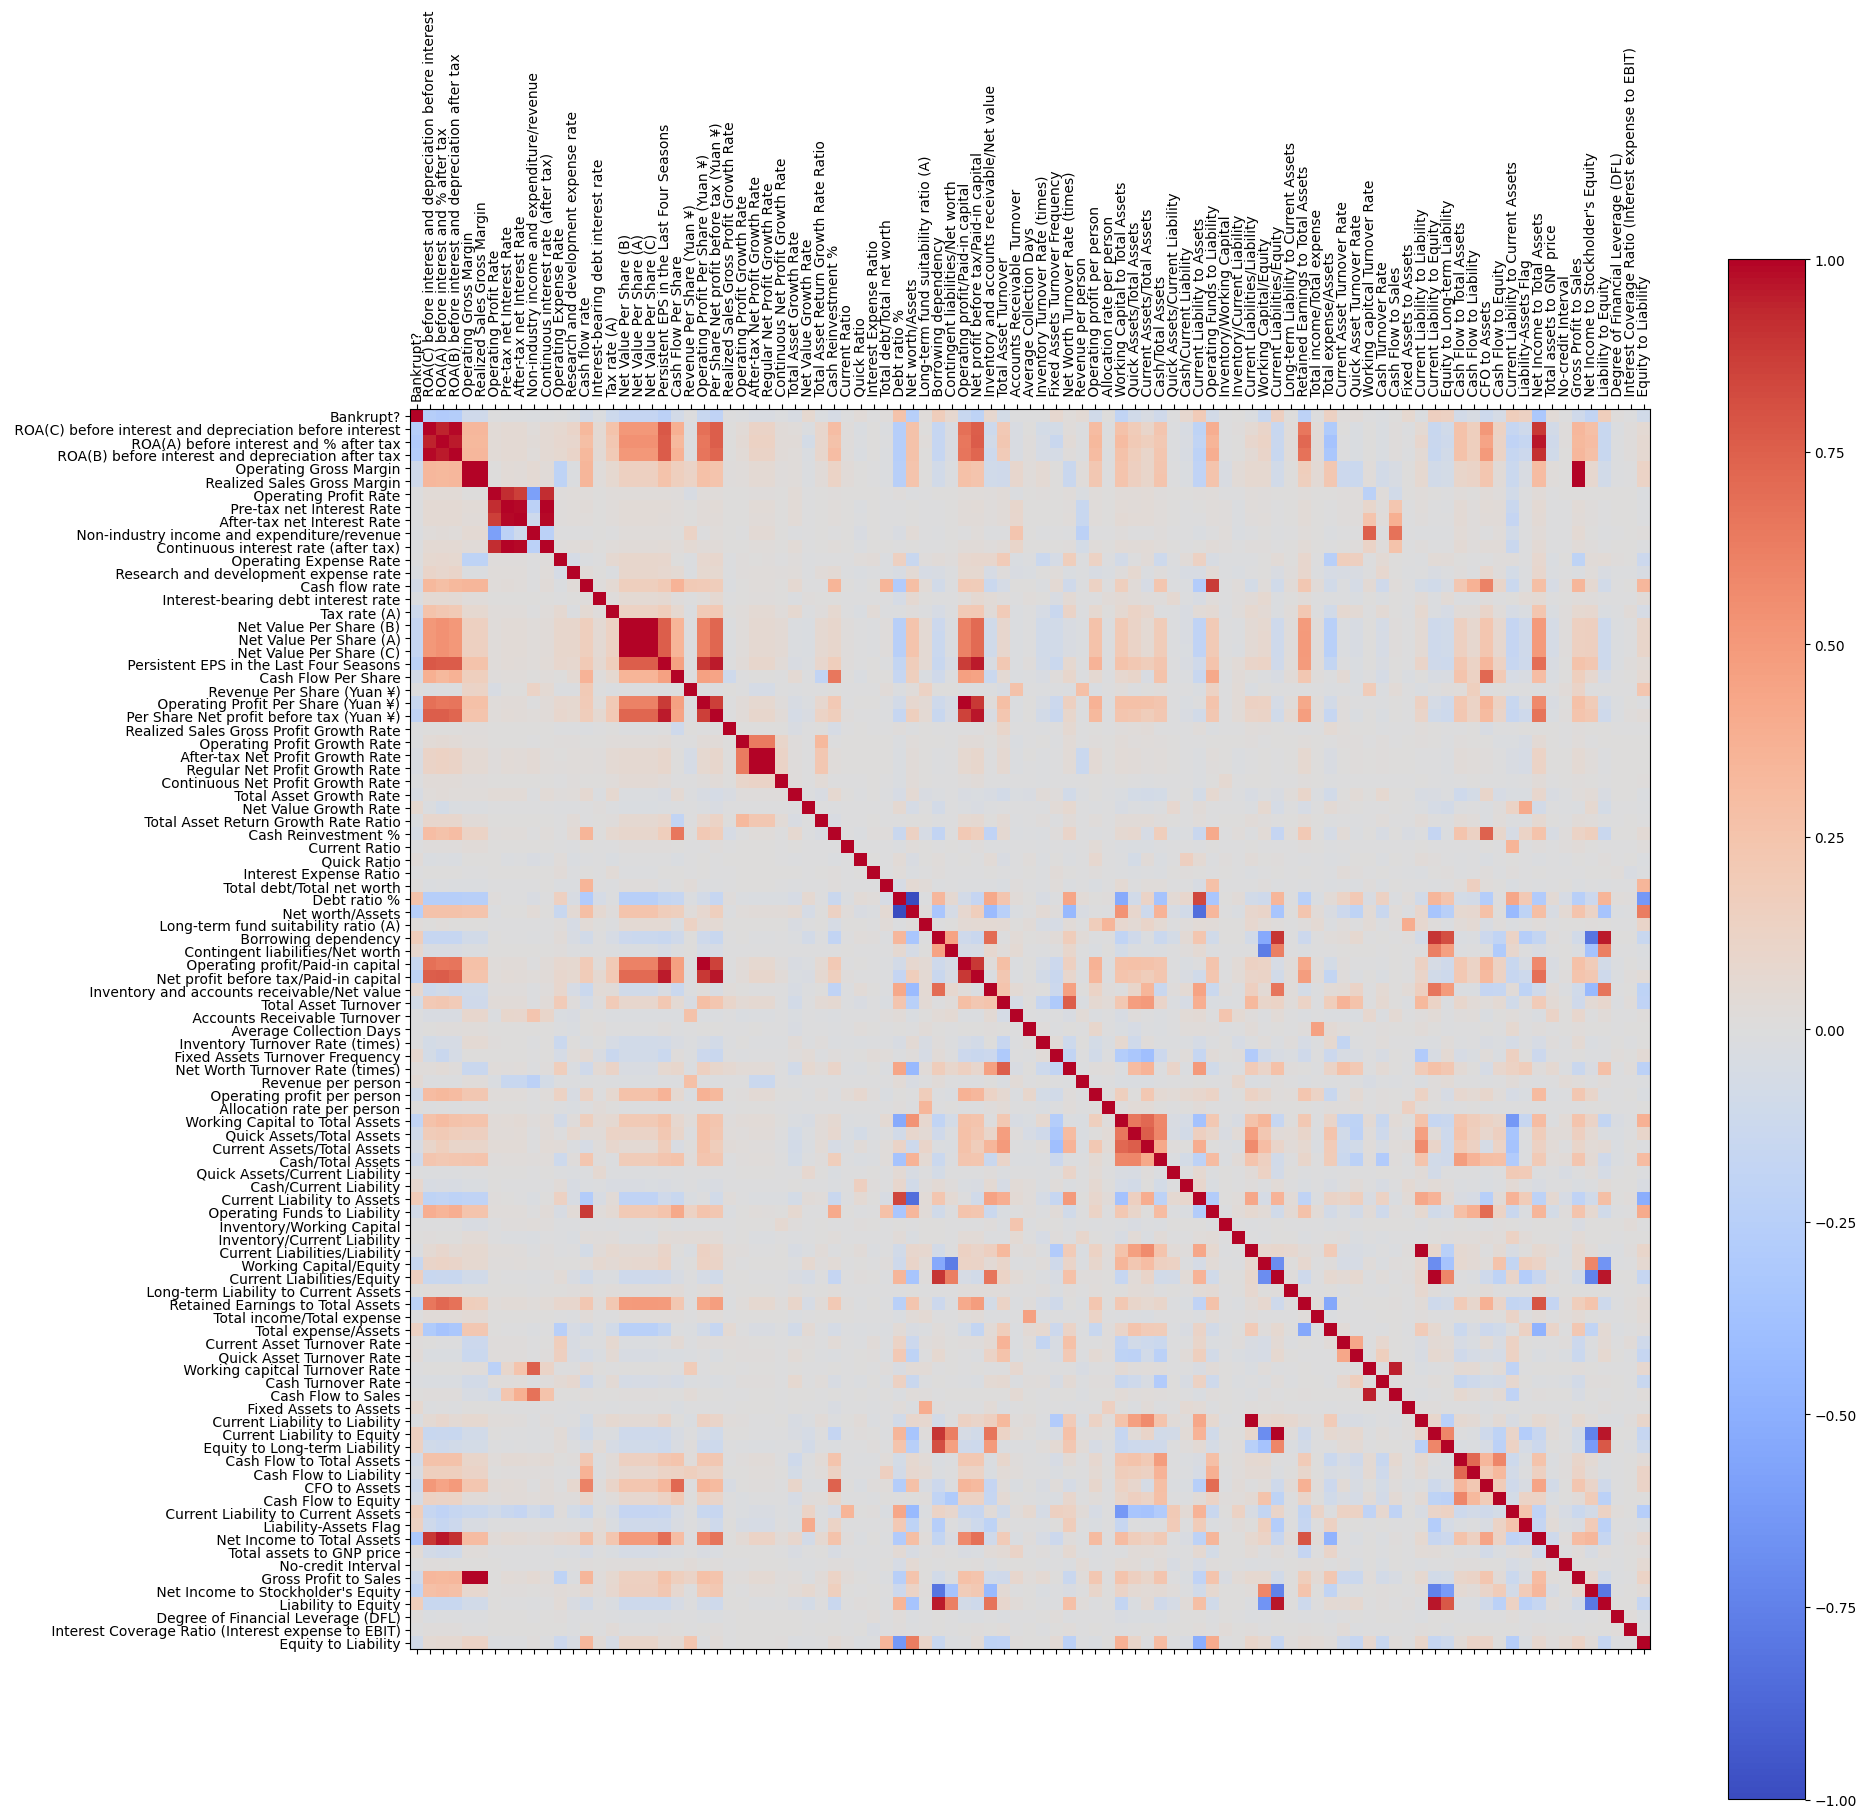

In [22]:
bdata = pd.read_csv("data.csv")
#Var[X_{Net Income Flag}] = 0, drop it
bdata = bdata.drop([' Net Income Flag'], axis = 1)

#Correlation Matrix
corrMat = bdata.corr()

#create color
fig,ax = plt.subplots(1,1, figsize = (20, 20))
cax = ax.matshow(corrMat, interpolation = 'nearest', cmap = "coolwarm")
fig.colorbar(cax)

list_cols = list(bdata.columns.values)
ax.set_xticks([i for i in range(len(list_cols))], labels = list_cols)
ax.set_yticks([i for i in range(len(list_cols))], labels = list_cols)
ax.tick_params(axis = 'x', labelrotation = 90)

plt.show()

In [4]:
# Find variables most correlated with Bankruptcy
bankCorr = corrMat['Bankrupt?'].sort_values(ascending = True)

negbankCorr = bankCorr[np.where(bankCorr <= -.13, True, False)]

posbankCorr = bankCorr[np.where(bankCorr >= .13, True, False)][:-1]

negbankCorr

 Net Income to Total Assets                                -0.315457
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(C) before interest and depreciation before interest   -0.260807
 Net worth/Assets                                          -0.250161
 Persistent EPS in the Last Four Seasons                   -0.219560
 Retained Earnings to Total Assets                         -0.217779
 Net profit before tax/Paid-in capital                     -0.207857
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Working Capital to Total Assets                           -0.193083
 Net Income to Stockholder's Equity                        -0.180987
 Net Value Per Share (A)                                   -0.165465
 Net Value Per Share (B)                                   -0.165399
 Net Value Per Share (C)                                   -0.164784
 Working Capital/Equity           

In [17]:
posbankCorr

 Equity to Long-term Liability          0.139014
 Total expense/Assets                   0.139049
 Liability-Assets Flag                  0.139212
 Current Liability to Equity            0.153828
 Current Liabilities/Equity             0.153828
 Liability to Equity                    0.166812
 Current Liability to Current Assets    0.171306
 Borrowing dependency                   0.176543
 Current Liability to Assets            0.194494
 Debt ratio %                           0.250161
Name: Bankrupt?, dtype: float64

In [5]:
#Create correlation matrix out of just those variables
highCorrfeatures = np.append(negbankCorr.index.values, posbankCorr.index.values)
corrdata = bdata[highCorrfeatures]

corrdataMat = corrdata.corr()

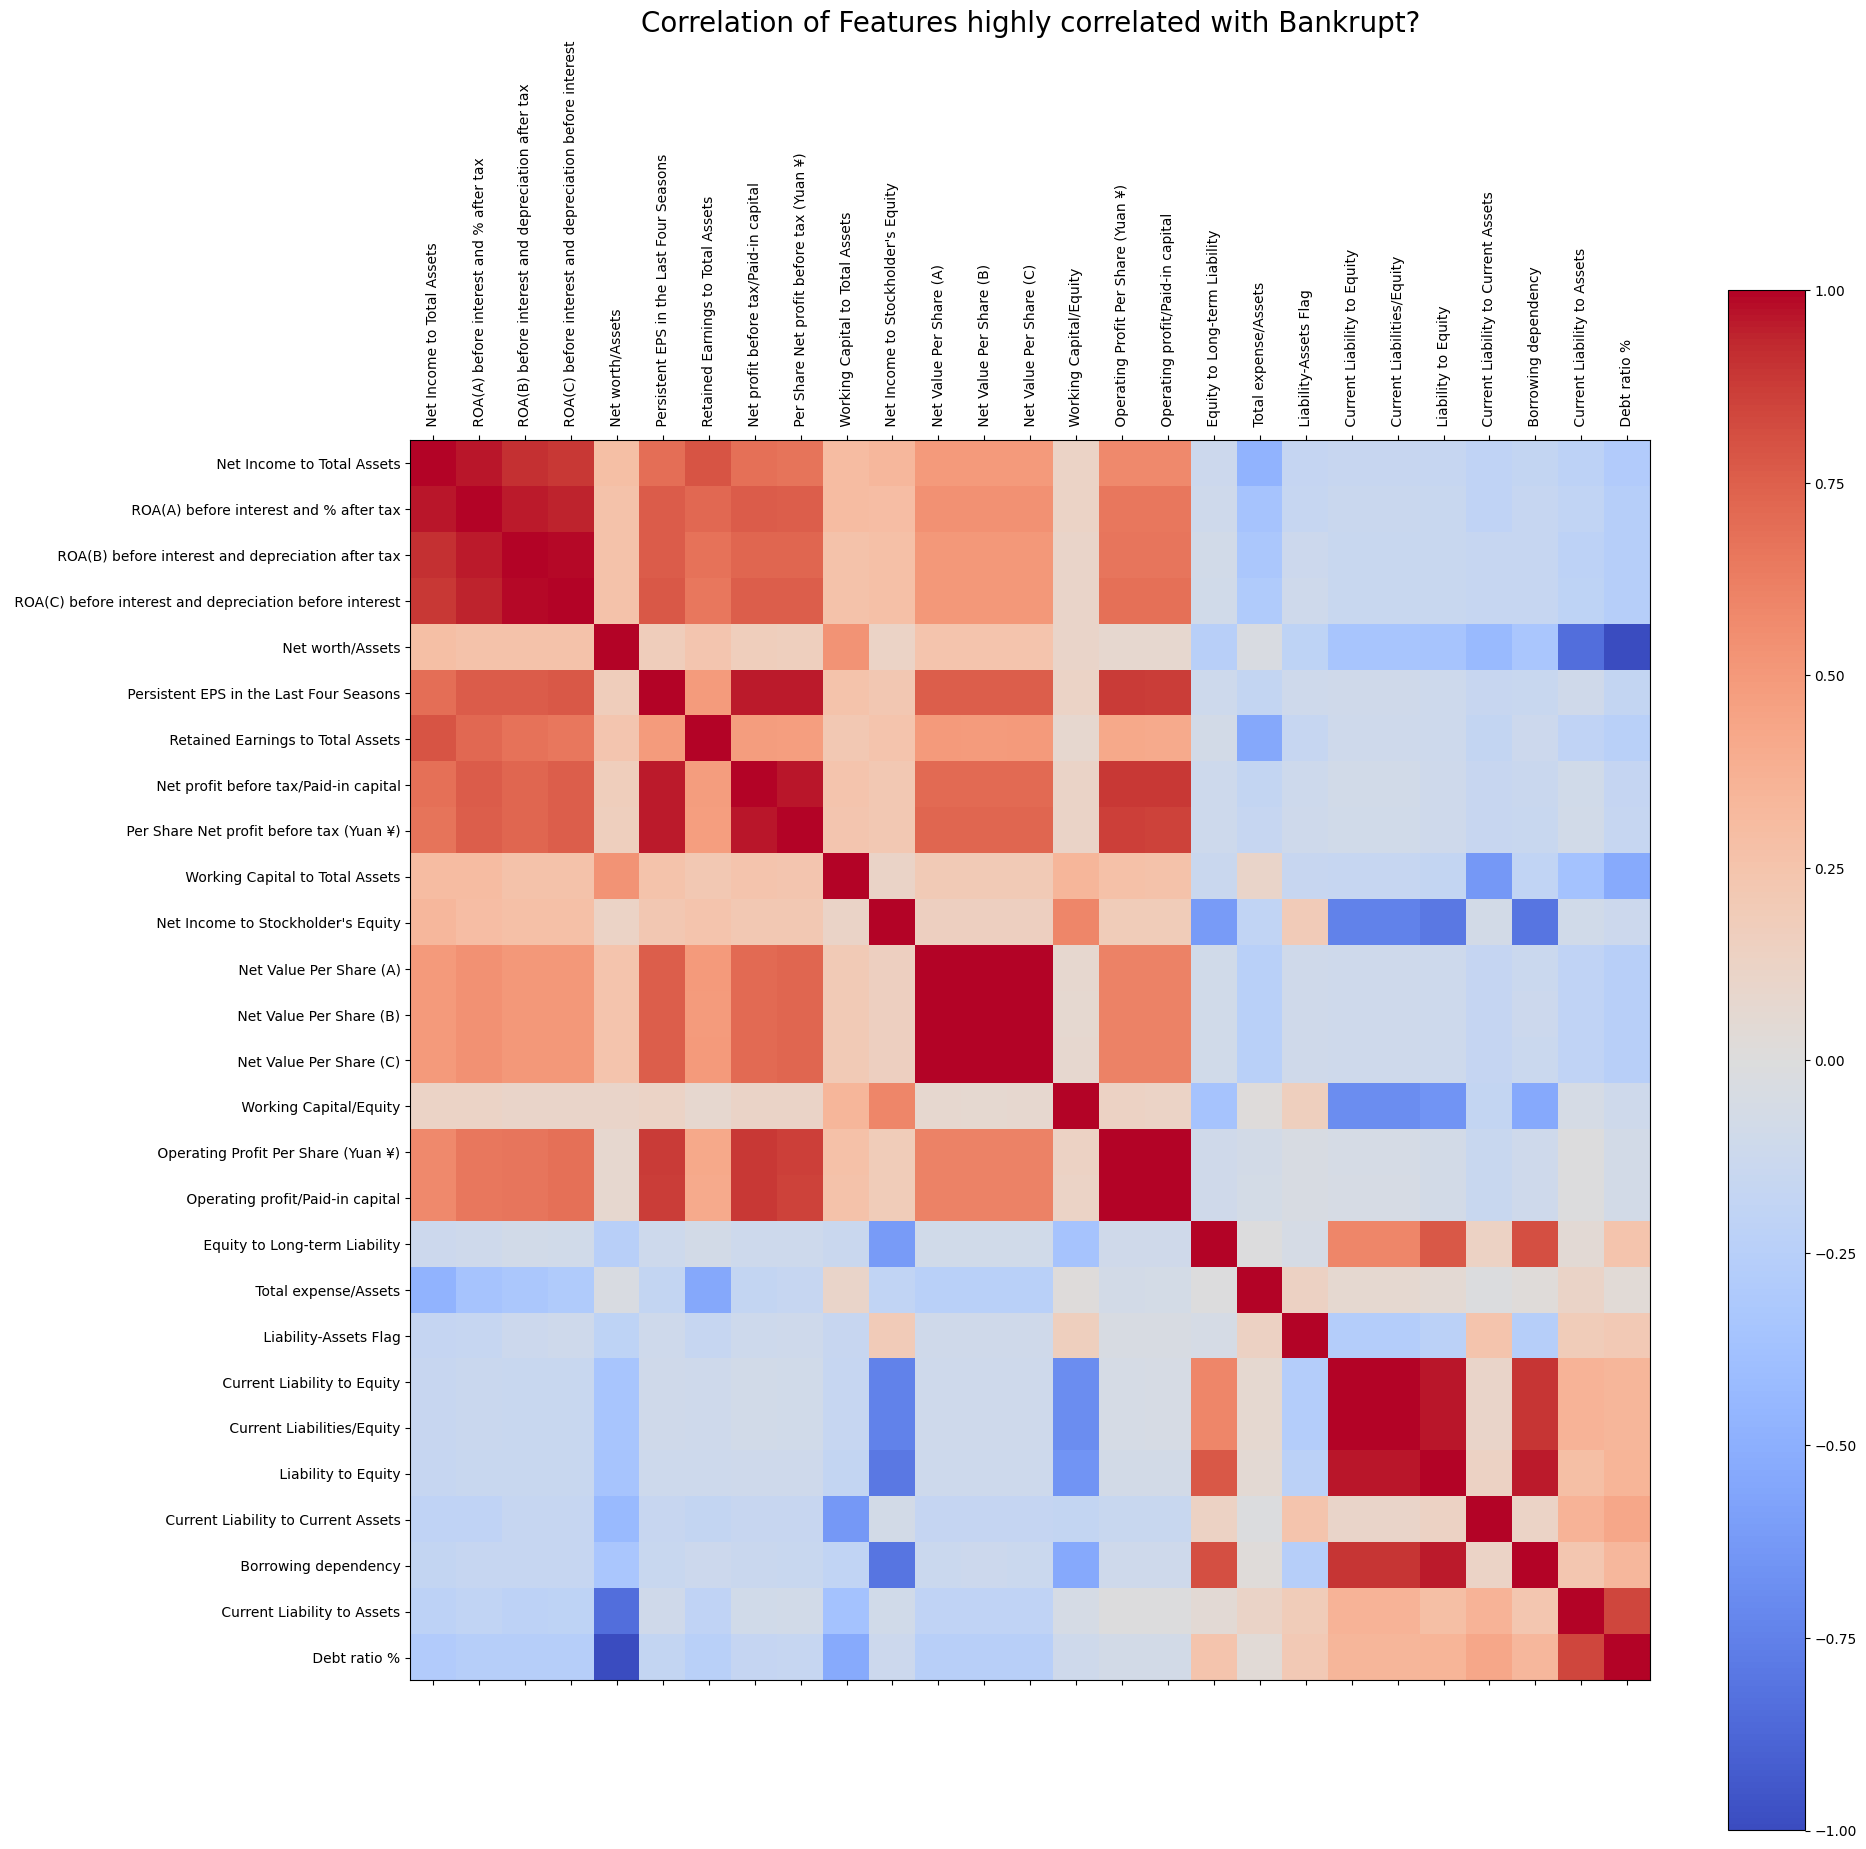

In [6]:
#Plot said matrix
#create color
fig2,ax2 = plt.subplots(1,1, figsize = (20, 20))
cax2 = ax2.matshow(corrdataMat, interpolation = 'nearest', cmap = "coolwarm")
fig2.colorbar(cax2)

list_cols2 = list(corrdata.columns.values)
ax2.set_xticks([i for i in range(len(list_cols2))], labels = list_cols2)
ax2.set_yticks([i for i in range(len(list_cols2))], labels = list_cols2)
ax2.tick_params(axis = 'x', labelrotation = 90)
ax2.set_title("Correlation of Features highly correlated with Bankrupt?", size = 20)

plt.show()

In [9]:
#Seperate X and Y
X = bdata.drop('Bankrupt?', axis = 1)
y = bdata['Bankrupt?']

## Principal Component Analysis

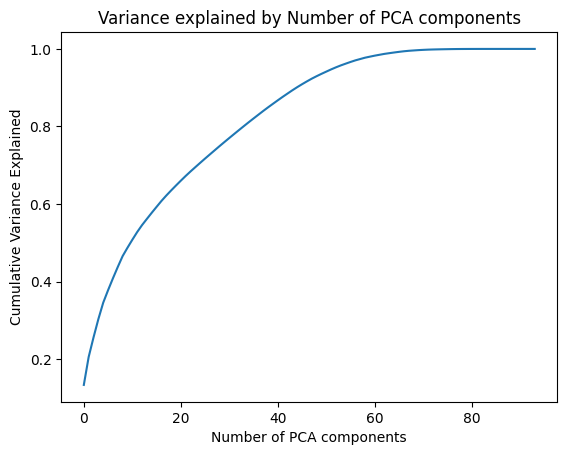

In [50]:
#Center and scale Data
X_std = StandardScaler().fit_transform(X)

#Implement PCA
pca = PCA().fit(X_std)
pca_data = pca.transform(X_std)

#graph explained variance
explained_var = np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)
x = np.array([component for component in range(len(explained_var))])
plt.plot(x, explained_var)
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Variance explained by Number of PCA components")
plt.show()

# Algorithm Implementation

## K-Nearest Neighbors

## Linear (and Quadratic) Discriminant Analysis

## Logistic Regression

## Naive Bayes

## Decision Trees (and Random Forests)